# Merge the data to work with them together

In [757]:
import pickle
import pandas as pd

with open('station_daily.pkl','rb') as mta_station_daily:
    stations_daily_data = pickle.load(mta_station_daily)

In [758]:
stations_daily_data.head()

,c/a,unit,station,date,daily_entries,daily_exits,daily_foot_traffic
0,A002,R051,59 ST,01/02/2019,12864.0,7980.0,20844.0
1,A002,R051,59 ST,01/03/2019,13464.0,8159.0,21623.0
2,A002,R051,59 ST,01/04/2019,13296.0,8155.0,21451.0
3,A002,R051,59 ST,01/05/2019,8130.0,4563.0,12693.0
4,A002,R051,59 ST,01/06/2019,6988.0,3787.0,10775.0


In [759]:
stations_daily_data["date_time"] = pd.to_datetime(stations_daily_data.date)

stations_daily_data["month"] = stations_daily_data["date_time"].dt.month

months = list(stations_daily_data['month'])
months_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
               6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

stations_daily_data['month'] = stations_daily_data.month.map(months_dict)

In [760]:
stations_daily_data.head()

,c/a,unit,station,date,daily_entries,daily_exits,daily_foot_traffic,date_time,month
0,A002,R051,59 ST,01/02/2019,12864.0,7980.0,20844.0,2019-01-02,Jan
1,A002,R051,59 ST,01/03/2019,13464.0,8159.0,21623.0,2019-01-03,Jan
2,A002,R051,59 ST,01/04/2019,13296.0,8155.0,21451.0,2019-01-04,Jan
3,A002,R051,59 ST,01/05/2019,8130.0,4563.0,12693.0,2019-01-05,Jan
4,A002,R051,59 ST,01/06/2019,6988.0,3787.0,10775.0,2019-01-06,Jan


In [761]:
stations_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270621 entries, 0 to 270620
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   c/a                 270621 non-null  object        
 1   unit                270621 non-null  object        
 2   station             270621 non-null  object        
 3   date                270621 non-null  object        
 4   daily_entries       270621 non-null  float64       
 5   daily_exits         270621 non-null  float64       
 6   daily_foot_traffic  270621 non-null  float64       
 7   date_time           270621 non-null  datetime64[ns]
 8   month               270621 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 18.6+ MB


In [762]:
with open('harassment_df.pkl','rb') as h_df:
    harassment_df = pickle.load(h_df)

In [763]:
harassment_df.tail()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name,cmplnt_fr_date_time,month
363,357960500,12/09/2019,06:10:00,12/09/2019,06:15:00,73,PATROL BORO BKLYN NORTH,BROADWAY JCT,2019-12-09 06:10:00,Dec
944,776468422,12/09/2019,11:20:00,12/09/2019,11:25:00,5,PATROL BORO MAN SOUTH,CHAMBERS ST,2019-12-09 11:20:00,Dec
632,542960465,12/09/2019,13:10:00,,,60,PATROL BORO BKLYN SOUTH,CONEY IS-STILLW,2019-12-09 13:10:00,Dec
732,625255780,12/11/2019,09:20:00,12/11/2019,09:25:00,43,PATROL BORO BRONX,PARKCHESTER,2019-12-11 09:20:00,Dec
541,476493258,12/31/2019,01:10:00,12/31/2019,01:15:00,19,PATROL BORO MAN NORTH,77 ST,2019-12-31 01:10:00,Dec


In [764]:
harassment_df_totals = harassment_df.copy()

In [765]:
harassment_df_totals['tot_crimes'] = harassment_df_totals.groupby('station_name').cmplnt_num.transform(lambda x: x.count())


In [766]:
harassment_df_totals.sort_values('tot_crimes',ascending=False,inplace=True)

In [767]:
harassment_df_totals

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name,cmplnt_fr_date_time,month,tot_crimes
308,314329802,01/31/2019,15:20:00,01/31/2019,15:22:00,13,PATROL BORO MAN SOUTH,14 ST,2019-01-31 15:20:00,Jan,41
947,778266446,01/25/2019,19:50:00,01/25/2019,19:55:00,13,PATROL BORO MAN SOUTH,14 ST,2019-01-25 19:50:00,Jan,41
180,229703968,06/12/2019,09:30:00,,,13,PATROL BORO MAN SOUTH,14 ST,2019-06-12 09:30:00,Jun,41
1077,862564287,09/03/2019,13:40:00,09/03/2019,14:00:00,10,PATROL BORO MAN SOUTH,14 ST,2019-09-03 13:40:00,Sep,41
791,666202192,04/03/2019,23:00:00,,,13,PATROL BORO MAN SOUTH,14 ST,2019-04-03 23:00:00,Apr,41
...,...,...,...,...,...,...,...,...,...,...,...
1132,906381341,05/26/2019,16:30:00,05/26/2019,17:00:00,114,PATROL BORO QUEENS NORTH,30 AV,2019-05-26 16:30:00,May,1
866,726074412,07/20/2019,19:20:00,07/20/2019,19:40:00,34,PATROL BORO MAN NORTH,191 ST,2019-07-20 19:20:00,Jul,1
804,675721410,07/22/2019,11:10:00,07/22/2019,11:15:00,41,PATROL BORO BRONX,E 149 ST,2019-07-22 11:10:00,Jul,1
887,739429171,07/22/2019,11:33:00,07/22/2019,11:38:00,107,PATROL BORO QUEENS SOUTH,SUTPHIN BLVD,2019-07-22 11:33:00,Jul,1


In [768]:
harassment_df_totals.drop_duplicates(subset=["station_name"], inplace=True)

In [769]:
harassment_df_totals

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,precinct,patrol_boro,station_name,cmplnt_fr_date_time,month,tot_crimes
308,314329802,01/31/2019,15:20:00,01/31/2019,15:22:00,13,PATROL BORO MAN SOUTH,14 ST,2019-01-31 15:20:00,Jan,41
1241,987159485,10/22/2019,17:00:00,10/22/2019,17:07:00,25,PATROL BORO MAN NORTH,125 ST,2019-10-22 17:00:00,Oct,36
92,169984935,08/12/2019,18:40:00,08/12/2019,18:48:00,14,PATROL BORO MAN SOUTH,TIMES SQ-42 ST,2019-08-12 18:40:00,Aug,32
1232,976979963,06/01/2019,23:00:00,,,84,PATROL BORO BKLYN NORTH,BOROUGH HALL,2019-06-01 23:00:00,Jun,26
602,524113664,09/25/2019,14:30:00,09/25/2019,14:30:00,14,PATROL BORO MAN SOUTH,GRD CNTRL-42 ST,2019-09-25 14:30:00,Sep,24
...,...,...,...,...,...,...,...,...,...,...,...
1132,906381341,05/26/2019,16:30:00,05/26/2019,17:00:00,114,PATROL BORO QUEENS NORTH,30 AV,2019-05-26 16:30:00,May,1
866,726074412,07/20/2019,19:20:00,07/20/2019,19:40:00,34,PATROL BORO MAN NORTH,191 ST,2019-07-20 19:20:00,Jul,1
804,675721410,07/22/2019,11:10:00,07/22/2019,11:15:00,41,PATROL BORO BRONX,E 149 ST,2019-07-22 11:10:00,Jul,1
887,739429171,07/22/2019,11:33:00,07/22/2019,11:38:00,107,PATROL BORO QUEENS SOUTH,SUTPHIN BLVD,2019-07-22 11:33:00,Jul,1


In [770]:
stations_with_crime = list(harassment_df_totals['station_name'])

In [771]:
len(stations_with_crime)

268

In [772]:
most_crime = harassment_df_totals.head(20)
most_crime_station = list(most_crime['station_name'])
most_crime_num = list(most_crime['tot_crimes'])

In [773]:
most_crime_station

['14 ST',
 '125 ST',
 'TIMES SQ-42 ST',
 'BOROUGH HALL',
 'GRD CNTRL-42 ST',
 '96 ST',
 '59 ST COLUMBUS',
 'W 4 ST-WASH SQ',
 '59 ST',
 'ATLANTIC AV',
 'FULTON ST',
 '42 ST-PORT AUTH',
 '34 ST-PENN STA',
 '14 ST-UNION SQ',
 '161/YANKEE STAD',
 'DEKALB AV',
 'WORLD TRADE CTR',
 'UNION ST',
 'CROWN HTS-UTICA',
 'CANAL ST']

In [774]:
most_crime_num

[41,
 36,
 32,
 26,
 24,
 23,
 22,
 20,
 19,
 19,
 18,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 14,
 14]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


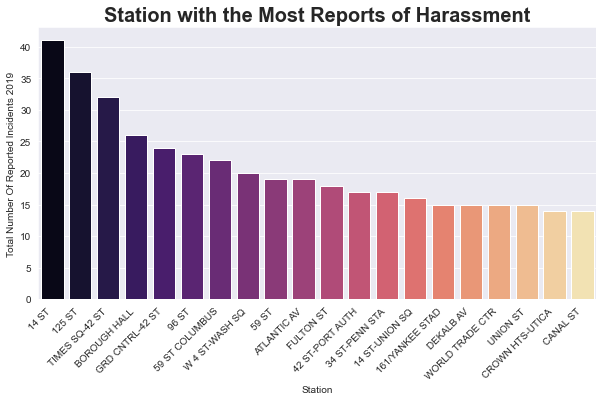

In [775]:

x = most_crime_station
y = most_crime_num

y_pos = np.arange(len(x))

plt.figure(figsize=(10,5))
sns.barplot(x,y, palette = 'magma')
plt.title('Station with the Most Reports of Harassment',fontweight='bold', fontsize = 20)
plt.xlabel('Station',fontsize = 10)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Number Of Reported Incidents 2019', fontsize = 10);

In [776]:
leas_trafficked_stations =['ORCHARD BEACH',
 'BROAD CHANNEL',
 'BEACH 105 ST',
 'TOMPKINSVILLE',
 'BEACH 98 ST',
 'ROCKAWAY PARK B',
 'NEPTUNE AV',
 'BEACH 36 ST',
 'BEACH 90 ST',
 'AQUEDUCT RACETR',
 'BEACH 44 ST',
 "E 143/ST MARY'S",
 'CYPRESS HILLS',
 'ATLANTIC AV',
 '215 ST',
 'AQUEDUCT N.COND',
 'AVENUE I',
 '55 ST',
 'BAY 50 ST',
 'AVENUE P']

In [777]:
stations_monthly_data = stations_daily_data.copy()

label_names = ['c/a','unit','daily_entries','daily_exits','date','date_time']

stations_monthly_data.drop(labels = label_names, axis=1, inplace=True)


In [778]:
stations_monthly_data['monthly_foot_traffic'] = stations_monthly_data.groupby(['station','month']).daily_foot_traffic.transform(lambda x: x.sum())

In [779]:
stations_monthly_data.head()

,station,daily_foot_traffic,month,monthly_foot_traffic
0,59 ST,20844.0,Jan,3063123.0
1,59 ST,21623.0,Jan,3063123.0
2,59 ST,21451.0,Jan,3063123.0
3,59 ST,12693.0,Jan,3063123.0
4,59 ST,10775.0,Jan,3063123.0


In [780]:
stations_monthly_data.tail()

,station,daily_foot_traffic,month,monthly_foot_traffic
270616,RIT-ROOSEVELT,3922.0,Dec,85491.0
270617,RIT-ROOSEVELT,4371.0,Dec,85491.0
270618,RIT-ROOSEVELT,3465.0,Dec,85491.0
270619,RIT-ROOSEVELT,2298.0,Dec,85491.0
270620,RIT-ROOSEVELT,3479.0,Dec,85491.0


In [781]:
to_drop = ['daily_foot_traffic']

stations_monthly_data.drop(labels = to_drop, axis=1, inplace=True)

In [782]:
stations_monthly_data.tail()

,station,month,monthly_foot_traffic
270616,RIT-ROOSEVELT,Dec,85491.0
270617,RIT-ROOSEVELT,Dec,85491.0
270618,RIT-ROOSEVELT,Dec,85491.0
270619,RIT-ROOSEVELT,Dec,85491.0
270620,RIT-ROOSEVELT,Dec,85491.0


In [783]:
stations_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270621 entries, 0 to 270620
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   station               270621 non-null  object 
 1   month                 270621 non-null  object 
 2   monthly_foot_traffic  270621 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.2+ MB


In [784]:
harassment_monthly_data = harassment_df.copy()

In [785]:
labels_to_drop = ['cmplnt_fr_dt','cmplnt_fr_tm','cmplnt_to_dt','cmplnt_to_tm','precinct','patrol_boro','cmplnt_fr_date_time']

harassment_monthly_data.drop(labels = labels_to_drop, axis=1, inplace=True)

In [786]:
harassment_monthly_data.head()

,cmplnt_num,station_name,month
462,424204952,238 ST,Jan
1105,882497514,CHURCH AV,Jan
330,331255620,96 ST,Jan
759,645301980,FOREST HILLS 71,Jan
116,183572104,161/YANKEE STAD,Jan


In [787]:
harassment_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 462 to 541
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cmplnt_num    1261 non-null   int64 
 1   station_name  1261 non-null   object
 2   month         1261 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.4+ KB


In [788]:
harassment_monthly_data['monthly_h_reports'] = harassment_monthly_data.groupby(['station_name','month']).cmplnt_num.transform(lambda x: x.nunique())

In [789]:
harassment_monthly_data.sample(10)

,cmplnt_num,station_name,month,monthly_h_reports
184,232106910,GRD CNTRL-42 ST,May,3
716,611679359,Not Specified,Oct,1
874,731980881,BOROUGH HALL,Feb,2
468,428882993,EAST BROADWAY,Jul,2
366,360568943,DYCKMAN ST,Apr,1
1103,880660388,FOREST HILLS 71,Dec,2
1229,973634162,WESTCHESTER SQ,Jan,1
369,363803125,QUEENS PLAZA,Oct,1
1168,930729663,GRAND ST,Aug,2
318,320329856,PROSPECT PARK,May,2


In [790]:
harassment_monthly_data.monthly_h_reports.max()

8

In [791]:
harassment_monthly_data.rename(columns = {'station_name':'station'}, inplace = True)

In [792]:
harassment_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 462 to 541
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cmplnt_num         1261 non-null   int64 
 1   station            1261 non-null   object
 2   month              1261 non-null   object
 3   monthly_h_reports  1261 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 49.3+ KB


In [793]:
merged_data = pd.merge(harassment_monthly_data,stations_monthly_data, on = ['station','month'])

In [794]:
merged_data.head()

,cmplnt_num,station,month,monthly_h_reports,monthly_foot_traffic
0,424204952,238 ST,Jan,1,87493.0
1,424204952,238 ST,Jan,1,87493.0
2,424204952,238 ST,Jan,1,87493.0
3,424204952,238 ST,Jan,1,87493.0
4,424204952,238 ST,Jan,1,87493.0


In [795]:
drop_this = ['cmplnt_num']

merged_data.drop(labels = drop_this, axis=1, inplace=True)

In [796]:
merged_data.drop_duplicates(inplace=True)

In [797]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 132407
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   station               870 non-null    object 
 1   month                 870 non-null    object 
 2   monthly_h_reports     870 non-null    int64  
 3   monthly_foot_traffic  870 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.0+ KB


In [798]:
high_crime = merged_data.sort_values('monthly_h_reports', ascending=False)

In [799]:
high_crime.head(20)

,station,month,monthly_h_reports,monthly_foot_traffic
31915,125 ST,Apr,8,3872489.0
112975,59 ST COLUMBUS,Nov,7,3685523.0
21413,14 ST,Mar,6,3145608.0
68009,125 ST,Jul,6,3741164.0
80498,125 ST,Aug,6,3723225.0
78886,14 ST,Aug,6,2795375.0
26524,TIMES SQ-42 ST,Mar,5,5231211.0
16266,96 ST,Feb,5,2684637.0
71914,GRD CNTRL-42 ST,Jul,5,9511448.0
12794,TIMES SQ-42 ST,Feb,5,4496480.0


In [800]:
high_foot_traffic = merged_data.sort_values('monthly_foot_traffic', ascending=False)

In [801]:
high_foot_traffic.head(20)

,station,month,monthly_h_reports,monthly_foot_traffic
34629,34 ST-PENN STA,Apr,4,11776998.0
18756,34 ST-PENN STA,Feb,1,9880455.0
71914,GRD CNTRL-42 ST,Jul,5,9511448.0
80281,GRD CNTRL-42 ST,Aug,1,9432573.0
77060,34 ST-PENN STA,Jul,1,9169419.0
108009,34 ST-PENN STA,Oct,1,9110219.0
49156,34 ST-PENN STA,May,2,8850471.0
56856,34 ST-PENN STA,Jun,1,8726020.0
128966,34 ST-PENN STA,Dec,1,8495627.0
111295,34 ST-PENN STA,Nov,4,8395706.0


In [802]:
import seaborn as sns

In [803]:
months_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,
               'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

merged_data['month_num'] = merged_data.month.map(months_dict)

In [804]:
merged_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
0,238 ST,Jan,1,87493.0,1
30,CHURCH AV,Jan,1,1918839.0,1
180,96 ST,Jan,3,2868531.0,1
630,FOREST HILLS 71,Jan,2,1015940.0,1
810,161/YANKEE STAD,Jan,1,858439.0,1
...,...,...,...,...,...
132066,UTICA AV,Dec,1,745755.0,12
132128,3 AV 138 ST,Dec,1,354447.0,12
132159,50 ST,Dec,1,2595454.0,12
132314,66 ST-LINCOLN,Dec,1,1230694.0,12


In [805]:
for_plot

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
0,238 ST,Jan,1,87493.0,1
8348,8 AV,Jan,1,1521454.0,1
8288,157 ST,Jan,1,554118.0,1
8258,PARKCHESTER,Jan,1,804585.0,1
8228,WESTCHESTER SQ,Jan,1,291858.0,1
...,...,...,...,...,...
125403,METROPOLITAN AV,Dec,1,593620.0,12
125217,116 ST,Dec,1,1344415.0,12
125186,LAFAYETTE AV,Dec,1,180147.0,12
126085,GRD CNTRL-42 ST,Dec,3,7036127.0,12


In [806]:
x =list(for_plot['monthly_foot_traffic'])
y =list(for_plot['monthly_h_reports'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


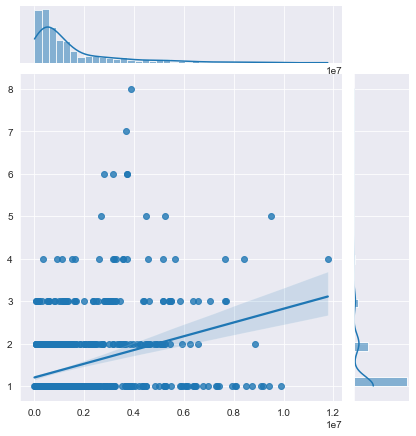

In [807]:
sns.jointplot(x,y, kind='reg', data='for_plot')

In [808]:
crimes = merged_data['monthly_h_reports']
foot_traffic = merged_data['monthly_foot_traffic']

In [809]:
import matplotlib.pyplot as plt

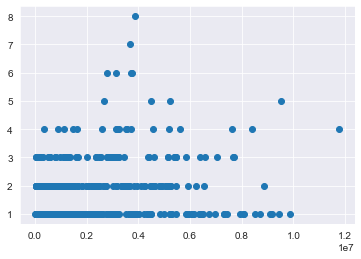

In [810]:
plt.scatter(x,y)

In [811]:
total_monthly_ft = merged_data.groupby('month_num').monthly_foot_traffic.sum()

In [812]:
total_monthly_ft

month_num
1     104304382.0
2     106522347.0
3     109910510.0
4     114550977.0
5     119169344.0
6     117659373.0
7     109477157.0
8     108055975.0
9     100551630.0
10    114322783.0
11    100298534.0
12    104775929.0
Name: monthly_foot_traffic, dtype: float64

### getting the correlation for foot traffic and crime for the year

In [813]:
yearly_ft_df = stations_daily_data.copy()

In [814]:
yearly_ft_df['yearly_ft'] = yearly_ft_df.groupby('station').daily_foot_traffic.transform(lambda x: x.sum())

In [815]:
yearly_ft_df.drop_duplicates(subset=['station'],inplace=True)

In [816]:
yearly_merged_data = merged_data.copy()

In [817]:
yearly_merged_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
0,238 ST,Jan,1,87493.0,1
30,CHURCH AV,Jan,1,1918839.0,1
180,96 ST,Jan,3,2868531.0,1
630,FOREST HILLS 71,Jan,2,1015940.0,1
810,161/YANKEE STAD,Jan,1,858439.0,1
...,...,...,...,...,...
132066,UTICA AV,Dec,1,745755.0,12
132128,3 AV 138 ST,Dec,1,354447.0,12
132159,50 ST,Dec,1,2595454.0,12
132314,66 ST-LINCOLN,Dec,1,1230694.0,12


In [818]:
yearly_merged_data['yearly_ft'] = yearly_merged_data.groupby('station').monthly_foot_traffic.transform(lambda x: x.sum())

In [819]:
yearly_merged_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,yearly_ft
0,238 ST,Jan,1,87493.0,1,207872.0
30,CHURCH AV,Jan,1,1918839.0,1,13106006.0
180,96 ST,Jan,3,2868531.0,1,29759683.0
630,FOREST HILLS 71,Jan,2,1015940.0,1,5143253.0
810,161/YANKEE STAD,Jan,1,858439.0,1,9739865.0
...,...,...,...,...,...,...
132066,UTICA AV,Dec,1,745755.0,12,5604518.0
132128,3 AV 138 ST,Dec,1,354447.0,12,1504253.0
132159,50 ST,Dec,1,2595454.0,12,5087181.0
132314,66 ST-LINCOLN,Dec,1,1230694.0,12,6632197.0


In [820]:
#it worked we now have the total foot traffic per station for 2019
yearly_merged_data[yearly_merged_data['station']=='238 ST']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,yearly_ft
0,238 ST,Jan,1,87493.0,1,207872.0
98407,238 ST,Sep,1,120379.0,9,207872.0


In [821]:
yearly_merged_data['yearly_crime'] = yearly_merged_data.groupby('station').monthly_h_reports.transform(lambda x: x.sum())

In [822]:
yearly_merged_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,yearly_ft,yearly_crime
0,238 ST,Jan,1,87493.0,1,207872.0,2
30,CHURCH AV,Jan,1,1918839.0,1,13106006.0,10
180,96 ST,Jan,3,2868531.0,1,29759683.0,23
630,FOREST HILLS 71,Jan,2,1015940.0,1,5143253.0,9
810,161/YANKEE STAD,Jan,1,858439.0,1,9739865.0,15
...,...,...,...,...,...,...,...
132066,UTICA AV,Dec,1,745755.0,12,5604518.0,9
132128,3 AV 138 ST,Dec,1,354447.0,12,1504253.0,5
132159,50 ST,Dec,1,2595454.0,12,5087181.0,4
132314,66 ST-LINCOLN,Dec,1,1230694.0,12,6632197.0,6


In [823]:
#it worked we now have the total crimes reported per station for 2019
yearly_merged_data[yearly_merged_data['station']=='238 ST']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,yearly_ft,yearly_crime
0,238 ST,Jan,1,87493.0,1,207872.0,2
98407,238 ST,Sep,1,120379.0,9,207872.0,2


In [824]:
yearly_merged_data.drop_duplicates(subset=["station"], inplace=True)

In [825]:
yearly_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 131911
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   station               267 non-null    object 
 1   month                 267 non-null    object 
 2   monthly_h_reports     267 non-null    int64  
 3   monthly_foot_traffic  267 non-null    float64
 4   month_num             267 non-null    int64  
 5   yearly_ft             267 non-null    float64
 6   yearly_crime          267 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 16.7+ KB


In [826]:
yearly_merged_data.head()

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,yearly_ft,yearly_crime
0,238 ST,Jan,1,87493.0,1,207872.0,2
30,CHURCH AV,Jan,1,1918839.0,1,13106006.0,10
180,96 ST,Jan,3,2868531.0,1,29759683.0,23
630,FOREST HILLS 71,Jan,2,1015940.0,1,5143253.0,9
810,161/YANKEE STAD,Jan,1,858439.0,1,9739865.0,15


In [827]:
yearly_merged_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,yearly_ft,yearly_crime
0,238 ST,Jan,1,87493.0,1,207872.0,2
30,CHURCH AV,Jan,1,1918839.0,1,13106006.0,10
180,96 ST,Jan,3,2868531.0,1,29759683.0,23
630,FOREST HILLS 71,Jan,2,1015940.0,1,5143253.0,9
810,161/YANKEE STAD,Jan,1,858439.0,1,9739865.0,15
...,...,...,...,...,...,...,...
130888,NECK RD,Dec,1,149526.0,12,149526.0,1
131694,163 ST-AMSTERDM,Dec,1,226435.0,12,226435.0,1
131725,SHEPHERD AV,Dec,1,125638.0,12,125638.0,1
131849,JEFFERSON ST,Dec,1,230512.0,12,230512.0,1


In [828]:
col_to_drop = ['month','monthly_h_reports','monthly_foot_traffic',]

yearly_merged_data.drop(labels= col_to_drop, axis=1, inplace=True)

In [829]:
yearly_merged_data

,station,month_num,yearly_ft,yearly_crime
0,238 ST,1,207872.0,2
30,CHURCH AV,1,13106006.0,10
180,96 ST,1,29759683.0,23
630,FOREST HILLS 71,1,5143253.0,9
810,161/YANKEE STAD,1,9739865.0,15
...,...,...,...,...
130888,NECK RD,12,149526.0,1
131694,163 ST-AMSTERDM,12,226435.0,1
131725,SHEPHERD AV,12,125638.0,1
131849,JEFFERSON ST,12,230512.0,1


In [830]:
#https://towardsdatascience.com/everything-you-need-to-know-about-ranking-with-pandas-aa2ab5921c01

yearly_merged_data[["yearly_ft","yearly_crime"]].apply(tuple, axis=1)

yearly_merged_data["rank"] = yearly_merged_data[["yearly_ft","yearly_crime"]].apply(tuple, axis=1).rank(ascending=False)

In [831]:
yearly_merged_data = yearly_merged_data.sort_values(by="rank", ignore_index=True)

In [832]:
yearly_data = yearly_merged_data.head(20)

In [833]:
yearly_merged_data.tail(50)

,station,month_num,yearly_ft,yearly_crime,rank
217,V.CORTLANDT PK,5,274103.0,1,218.0
218,KINGSTON AV,5,241867.0,1,219.0
219,EASTN PKWY-MUSM,3,238220.0,1,220.0
220,MT EDEN AV,10,237770.0,1,221.0
221,RALPH AV,4,237173.0,1,222.0
222,BEACH 67 ST,8,233872.0,2,223.0
223,E 149 ST,7,231657.0,1,224.0
224,JEFFERSON ST,12,230512.0,1,225.0
225,ROCKAWAY BLVD,12,229326.0,1,226.0
226,LIBERTY AV,10,227789.0,2,227.0


In [834]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


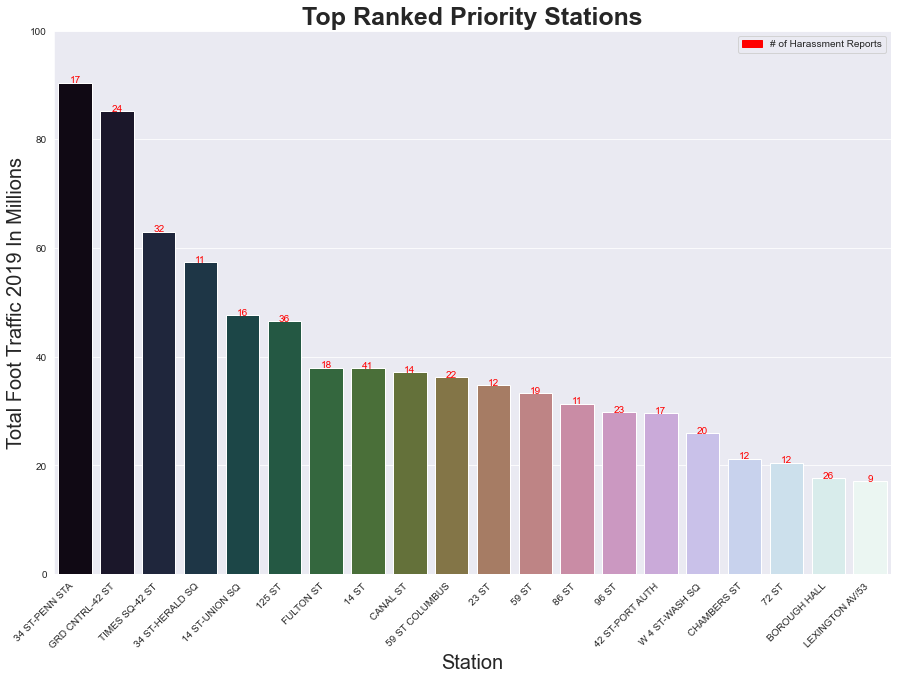

In [835]:
# addlabels functions: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

import matplotlib.patches as mpatches

x = list(yearly_data.station)
y = list(yearly_data.yearly_ft)


labels_list = list(yearly_data.yearly_crime)


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], labels_list[i], ha = 'center',c = 'r')


y_pos = np.arange(len(x))


plt.figure(figsize=(15,10))
ax = sns.barplot(x,y, palette = 'cubehelix')
addlabels(x, y)
red_patch = mpatches.Patch(color='red', label='# of Harassment Reports')
ax.legend(handles=[red_patch])
plt.title('Top Ranked Priority Stations',fontweight='bold', fontsize = 25)
plt.xlabel('Station',fontsize = 20)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Foot Traffic 2019 In Millions', fontsize = 20)
plt.yticks(ticks=[0,20000000,40000000,60000000,80000000,100000000],labels=[0,20,40,60,80,100]);

In [836]:
ax.text(1,1,labels_list, color='r', ha="center")

Text(1, 1, '[17, 24, 32, 11, 16, 36, 18, 41, 14, 22, 12, 19, 11, 23, 17, 20, 12, 12, 26, 9]')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


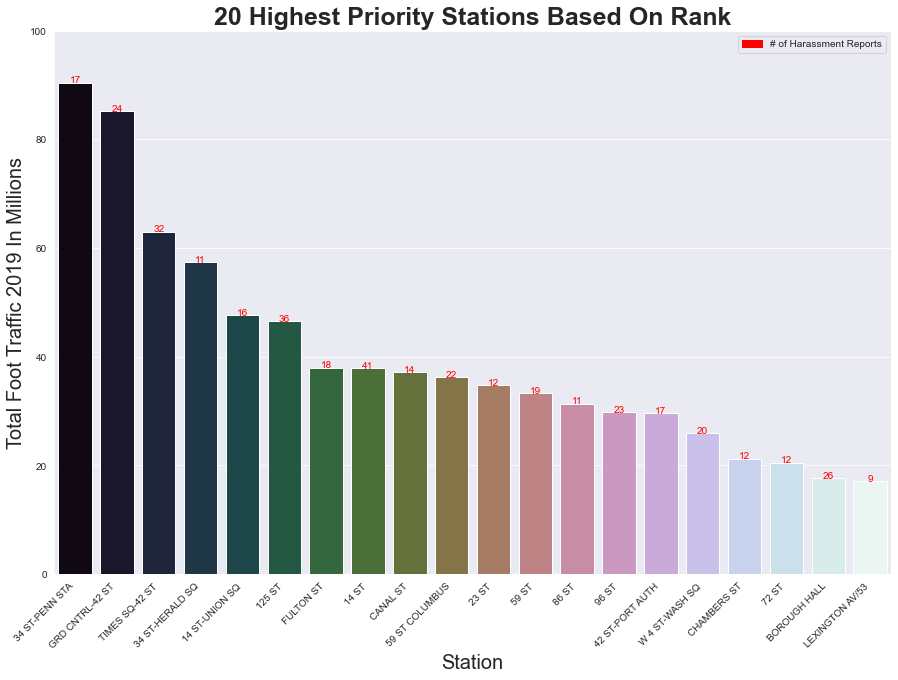

In [837]:
# addlabels function source: srishivansh5404 3/26/21 
#https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

import matplotlib.patches as mpatches

x = list(yearly_data.station)
y = list(yearly_data.yearly_ft)


labels_list = list(yearly_data.yearly_crime)


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], labels_list[i], ha = 'center',c = 'r')


y_pos = np.arange(len(x))


plt.figure(figsize=(15,10))
ax = sns.barplot(x,y, palette = 'cubehelix')
addlabels(x, y)
red_patch = mpatches.Patch(color='red', label='# of Harassment Reports')
ax.legend(handles=[red_patch])
plt.title('20 Highest Priority Stations Based On Rank',fontweight='bold', fontsize = 25)
plt.xlabel('Station',fontsize = 20)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Total Foot Traffic 2019 In Millions', fontsize = 20)
plt.yticks(ticks=[0,20000000,40000000,60000000,80000000,100000000],labels=[0,20,40,60,80,100]);

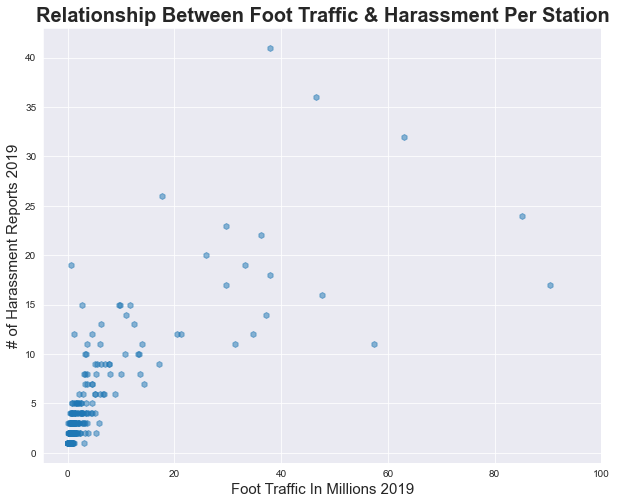

In [838]:
x_1 = list(yearly_merged_data.yearly_ft)
y_1 = list(yearly_merged_data.yearly_crime)

plt.figure(figsize=(10,8))
plt.scatter(x_1,y_1,alpha=0.5,marker='h')
plt.title('Relationship Between Foot Traffic & Harassment Per Station',fontweight='bold', fontsize = 20)
plt.xlabel('Foot Traffic In Millions 2019',fontsize = 15)
plt.ylabel('# of Harassment Reports 2019', fontsize = 15)
plt.xticks(ticks=[0,20000000,40000000,60000000,80000000,100000000],labels=[0,20,40,60,80,100]);

# Corrlation
## Foot Traffic & Crime Reports for the year

In [839]:
crimes = yearly_merged_data['yearly_crime']
foot_traffic = yearly_merged_data['yearly_ft']

correlation = crimes.corr(foot_traffic)

In [840]:
yearly_merged_data['yearly_crime']

0      17
1      24
2      32
3      11
4      16
       ..
262     1
263     1
264     1
265     1
266     1
Name: yearly_crime, Length: 267, dtype: int64

In [841]:
correlation 

0.7629330312326914

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


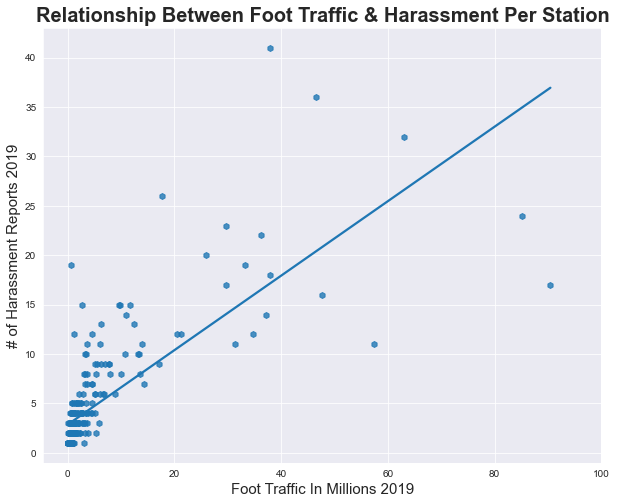

In [842]:
x_1 = list(yearly_merged_data.yearly_ft)
y_1 = list(yearly_merged_data.yearly_crime)

plt.figure(figsize=(10,8))
sns.regplot(x_1,y_1,ci=None,marker='h')
plt.title('Relationship Between Foot Traffic & Harassment Per Station',fontweight='bold', fontsize = 20)
plt.xlabel('Foot Traffic In Millions 2019',fontsize = 15)
plt.ylabel('# of Harassment Reports 2019', fontsize = 15)
plt.xticks(ticks=[0,20000000,40000000,60000000,80000000,100000000],labels=[0,20,40,60,80,100]);

Visualize data for trends in monthly reports at the previously identified priority stations.

In [843]:
months_data = merged_data.sort_values('month_num')

In [844]:
months_data 

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
0,238 ST,Jan,1,87493.0,1
8348,8 AV,Jan,1,1521454.0,1
8288,157 ST,Jan,1,554118.0,1
8258,PARKCHESTER,Jan,1,804585.0,1
8228,WESTCHESTER SQ,Jan,1,291858.0,1
...,...,...,...,...,...
125403,METROPOLITAN AV,Dec,1,593620.0,12
125217,116 ST,Dec,1,1344415.0,12
125186,LAFAYETTE AV,Dec,1,180147.0,12
126085,GRD CNTRL-42 ST,Dec,3,7036127.0,12


In [845]:
months_data[months_data['station']=='34 ST-PENN STA']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
9128,34 ST-PENN STA,Jan,1,7935429.0,1
18756,34 ST-PENN STA,Feb,1,9880455.0,2
34629,34 ST-PENN STA,Apr,4,11776998.0,4
49156,34 ST-PENN STA,May,2,8850471.0,5
56856,34 ST-PENN STA,Jun,1,8726020.0,6
77060,34 ST-PENN STA,Jul,1,9169419.0,7
88403,34 ST-PENN STA,Aug,1,8096313.0,8
108009,34 ST-PENN STA,Oct,1,9110219.0,10
111295,34 ST-PENN STA,Nov,4,8395706.0,11
128966,34 ST-PENN STA,Dec,1,8495627.0,12


In [846]:
months_data[months_data['station']=='GRD CNTRL-42 ST']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
6974,GRD CNTRL-42 ST,Jan,1,6978841.0,1
17132,GRD CNTRL-42 ST,Feb,1,6501359.0,2
28367,GRD CNTRL-42 ST,Mar,1,7426749.0,3
38856,GRD CNTRL-42 ST,Apr,4,7634812.0,4
45197,GRD CNTRL-42 ST,May,3,7688477.0,5
62256,GRD CNTRL-42 ST,Jun,1,7304262.0,6
71914,GRD CNTRL-42 ST,Jul,5,9511448.0,7
80281,GRD CNTRL-42 ST,Aug,1,9432573.0,8
96157,GRD CNTRL-42 ST,Sep,3,7651049.0,9
107575,GRD CNTRL-42 ST,Oct,1,8043412.0,10


In [847]:
months_data[months_data['station']=='TIMES SQ-42 ST']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
5774,TIMES SQ-42 ST,Jan,2,4640032.0,1
12794,TIMES SQ-42 ST,Feb,5,4496480.0,2
26524,TIMES SQ-42 ST,Mar,5,5231211.0,3
33339,TIMES SQ-42 ST,Apr,3,5398927.0,4
46251,TIMES SQ-42 ST,May,3,5475287.0,5
59316,TIMES SQ-42 ST,Jun,3,5468768.0,6
75696,TIMES SQ-42 ST,Jul,1,5880345.0,7
87876,TIMES SQ-42 ST,Aug,2,5225579.0,8
97687,TIMES SQ-42 ST,Sep,1,5210274.0,9
105033,TIMES SQ-42 ST,Oct,4,5631837.0,10


In [848]:
months_data[months_data['station']=='34 ST-HERALD SQ']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
3380,34 ST-HERALD SQ,Jan,1,5831204.0,1
15482,34 ST-HERALD SQ,Feb,1,5473044.0,2
29638,34 ST-HERALD SQ,Mar,1,6752615.0,3
43352,34 ST-HERALD SQ,Apr,1,6393366.0,4
61896,34 ST-HERALD SQ,Jun,1,6349897.0,6
78576,34 ST-HERALD SQ,Aug,2,6557516.0,8
92677,34 ST-HERALD SQ,Sep,2,6247902.0,9
120170,34 ST-HERALD SQ,Nov,1,6445296.0,11
129679,34 ST-HERALD SQ,Dec,1,7330474.0,12


In [849]:
months_data[months_data['station']=='14 ST-UNION SQ']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
1040,14 ST-UNION SQ,Jan,2,4796272.0,1
12514,14 ST-UNION SQ,Feb,2,4876538.0,2
22890,14 ST-UNION SQ,Mar,1,6097500.0,3
39816,14 ST-UNION SQ,Apr,3,5413279.0,4
53117,14 ST-UNION SQ,May,1,5974536.0,5
58476,14 ST-UNION SQ,Jun,2,5135436.0,6
70303,14 ST-UNION SQ,Jul,1,4991824.0,7
91897,14 ST-UNION SQ,Sep,1,5242314.0,9
117202,14 ST-UNION SQ,Nov,3,5155729.0,11


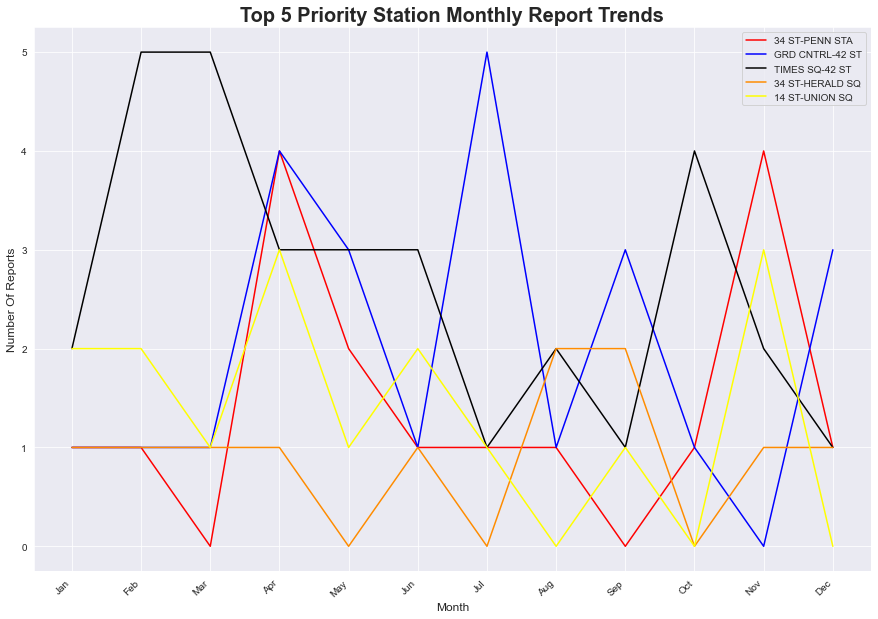

In [850]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_1 = [1,1,0,4,2,1,1,1,0,1,4,1]
y_2 = [1,1,1,4,3,1,5,1,3,1,0,3]
y_3 = [2,5,5,3,3,3,1,2,1,4,2,1]
y_4 = [1,1,1,1,0,1,0,2,2,0,1,1]
y_5 = [2,2,1,3,1,2,1,0,1,0,3,0]


y_pos = np.arange(len(x))

plt.figure(figsize=(15,10))
plt.plot(x,y_1, color = 'red')
plt.plot(x,y_2, color = 'blue')
plt.plot(x,y_3, color = 'black')
plt.plot(x,y_4, color = 'darkorange')
plt.plot(x,y_5, color = 'yellow')
plt.title('Top 5 Priority Station Monthly Report Trends',fontweight='bold', fontsize = 20)
plt.xlabel('Month',fontsize = 12)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Number Of Reports', fontsize = 12)
plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','TIMES SQ-42 ST','34 ST-HERALD SQ','14 ST-UNION SQ']);

In [851]:
months_data[months_data['station']=='59 ST COLUMBUS']

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
2450,59 ST COLUMBUS,Jan,2,3148757.0,1
19512,59 ST COLUMBUS,Feb,1,3183374.0,2
21227,59 ST COLUMBUS,Mar,2,3595856.0,3
38226,59 ST COLUMBUS,Apr,1,3701432.0,4
53548,59 ST COLUMBUS,May,1,3692108.0,5
70706,59 ST COLUMBUS,Jul,2,3327590.0,7
98857,59 ST COLUMBUS,Sep,1,3842016.0,9
104146,59 ST COLUMBUS,Oct,1,4474001.0,10
112975,59 ST COLUMBUS,Nov,7,3685523.0,11
122427,59 ST COLUMBUS,Dec,4,3572595.0,12


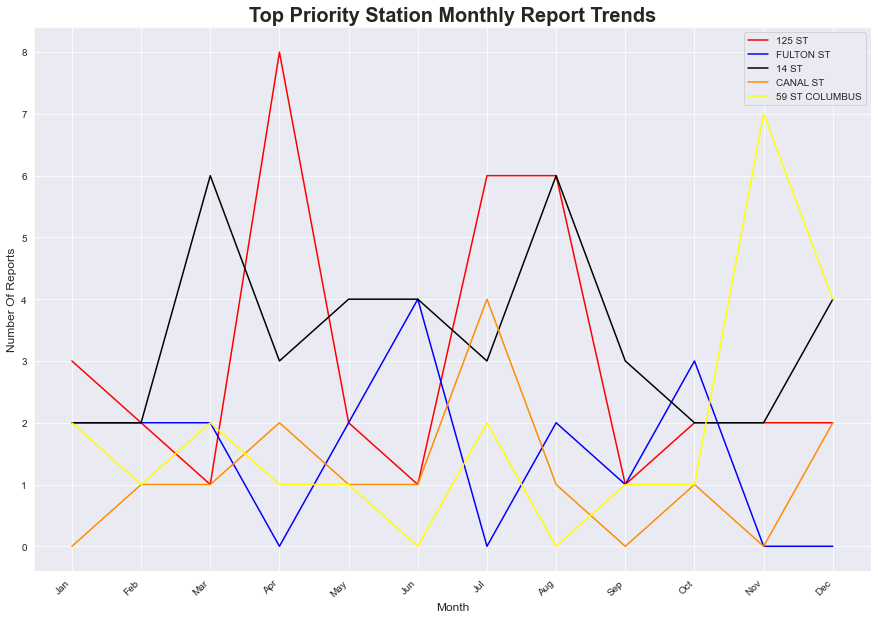

In [852]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_1 = [3,2,1,8,2,1,6,6,1,2,2,2]
y_2 = [2,2,2,0,2,4,0,2,1,3,0,0]
y_3 = [2,2,6,3,4,4,3,6,3,2,2,4]
y_4 = [0,1,1,2,1,1,4,1,0,1,0,2]
y_5 = [2,1,2,1,1,0,2,0,1,1,7,4]


y_pos = np.arange(len(x))

plt.figure(figsize=(15,10))
plt.plot(x,y_1, color = 'red')
plt.plot(x,y_2, color = 'blue')
plt.plot(x,y_3, color = 'black')
plt.plot(x,y_4, color = 'darkorange')
plt.plot(x,y_5, color = 'yellow')
plt.title('Top Priority Station Monthly Report Trends',fontweight='bold', fontsize = 20)
plt.xlabel('Month',fontsize = 12)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Number Of Reports', fontsize = 12)
plt.legend(['125 ST','FULTON ST','14 ST','CANAL ST','59 ST COLUMBUS']);

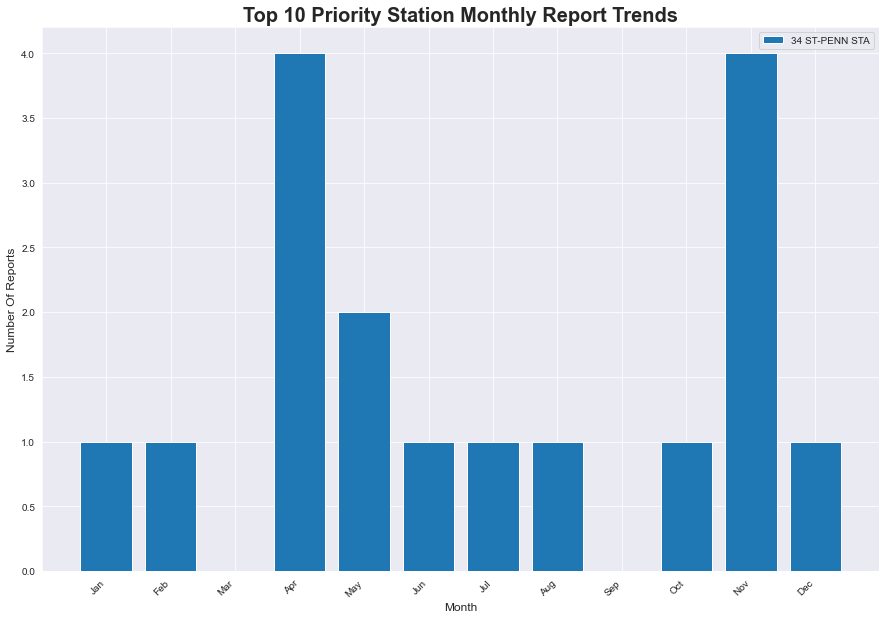

In [853]:
plot_x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plot_y = [1,1,0,4,2,1,1,1,0,1,4,1]
[1,1,1,4,3,1,5,1,3,1,0,3]
[2,5,5,3,3,3,1,2,1,4,2,1]
[1,1,1,1,0,1,0,2,2,0,1,1]
[2,2,1,3,1,2,1,0,1,0,3,0]
[3,2,1,8,2,1,6,6,1,2,2,2]
[2,2,2,0,2,4,0,2,1,3,0,0]
[2,2,6,3,4,4,3,6,3,2,2,4]
[0,1,1,2,1,1,4,1,0,1,0,2]
[2,1,2,1,1,0,2,0,1,1,7,4]



y_pos = np.arange(len(x))

plt.figure(figsize=(15,10))
plt.bar(plot_x,plot_y)
plt.title('Top 10 Priority Station Monthly Report Trends',fontweight='bold', fontsize = 20)
plt.xlabel('Month',fontsize = 12)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Number Of Reports', fontsize = 12)
plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','TIMES SQ-42 ST','34 ST-HERALD SQ','14 ST-UNION SQ','125 ST','FULTON ST','14 ST','CANAL ST','59 ST COLUMBUS']);

In [854]:
months_data_to_plot = months_data[(months_data['station'] == '34 ST-PENN STA') | (months_data['station'] == 'GRD CNTRL-42 ST')
                                  | (months_data['station'] == 'TIMES SQ-42 ST')|(months_data['station'] == '34 ST-HERALD SQ')
                                 |(months_data['station'] == '14 ST-UNION SQ')|(months_data['station'] == '125 ST')
                                 |(months_data['station'] == 'FULTON ST')|(months_data['station'] == '14 ST')|
                                 (months_data['station'] == 'CANAL ST')|(months_data['station'] == '59 ST COLUMBUS')]

In [855]:
months_data_to_plot

,station,month,monthly_h_reports,monthly_foot_traffic,month_num
6974,GRD CNTRL-42 ST,Jan,1,6978841.0,1
6254,FULTON ST,Jan,2,4105058.0,1
9128,34 ST-PENN STA,Jan,1,7935429.0,1
5774,TIMES SQ-42 ST,Jan,2,4640032.0,1
2450,59 ST COLUMBUS,Jan,2,3148757.0,1
...,...,...,...,...,...
124287,TIMES SQ-42 ST,Dec,1,5213059.0,12
122985,14 ST,Dec,4,3545100.0,12
122427,59 ST COLUMBUS,Dec,4,3572595.0,12
124814,125 ST,Dec,2,3662154.0,12


In [856]:
months_data_to_plot['monthly_h_reports'].astype('int')

6974      1
6254      2
9128      1
5774      2
2450      2
         ..
124287    1
122985    4
122427    4
124814    2
126085    3
Name: monthly_h_reports, Length: 102, dtype: int64

In [858]:
months_data_to_plot['monthly_av'] = months_data_to_plot.groupby('month').monthly_h_reports.transform(lambda x:x.mean())

/var/folders/lh/579wc67x6xgc_8dnfp0724fc0000gn/T/ipykernel_1371/2745340574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months_data_to_plot['monthly_av'] = months_data_to_plot.groupby('month').monthly_h_reports.transform(lambda x:x.mean())


In [859]:
months_data_to_plot

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,monthly_av
6974,GRD CNTRL-42 ST,Jan,1,6978841.0,1,1.777778
6254,FULTON ST,Jan,2,4105058.0,1,1.777778
9128,34 ST-PENN STA,Jan,1,7935429.0,1,1.777778
5774,TIMES SQ-42 ST,Jan,2,4640032.0,1,1.777778
2450,59 ST COLUMBUS,Jan,2,3148757.0,1,1.777778
...,...,...,...,...,...,...
124287,TIMES SQ-42 ST,Dec,1,5213059.0,12,2.250000
122985,14 ST,Dec,4,3545100.0,12,2.250000
122427,59 ST COLUMBUS,Dec,4,3572595.0,12,2.250000
124814,125 ST,Dec,2,3662154.0,12,2.250000


In [860]:
data = list(months_data_to_plot.monthly_av.unique())

In [861]:
data 

[1.7777777777777777,
 1.8,
 2.2222222222222223,
 3.2222222222222223,
 2.111111111111111,
 2.0,
 2.875,
 2.625,
 1.625,
 1.875,
 3.0,
 2.25]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


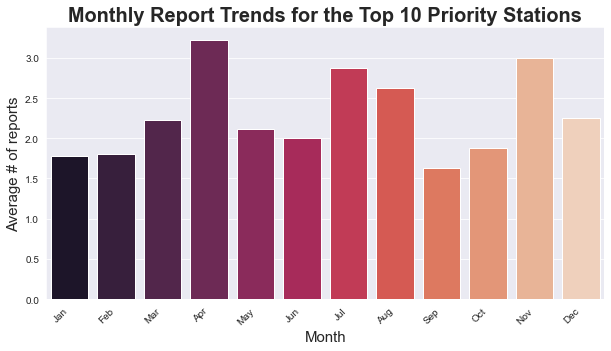

In [862]:
plot_x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plot_y = data

y_pos = np.arange(len(x))


plt.figure(figsize=(10,5))
ax = sns.barplot(plot_x,plot_y, palette = 'rocket')
plt.title('Monthly Report Trends for the Top 10 Priority Stations',fontweight='bold', fontsize = 20)
plt.xlabel('Month',fontsize = 15)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Average # of reports', fontsize = 15);

In [863]:
months_data.station.nunique()

267

In [864]:
months_data['monthly_average'] = months_data.groupby('month').monthly_h_reports.transform(lambda x: x.mean())

In [865]:
months_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,monthly_average
0,238 ST,Jan,1,87493.0,1,1.357143
8348,8 AV,Jan,1,1521454.0,1,1.357143
8288,157 ST,Jan,1,554118.0,1,1.357143
8258,PARKCHESTER,Jan,1,804585.0,1,1.357143
8228,WESTCHESTER SQ,Jan,1,291858.0,1,1.357143
...,...,...,...,...,...,...
125403,METROPOLITAN AV,Dec,1,593620.0,12,1.372093
125217,116 ST,Dec,1,1344415.0,12,1.372093
125186,LAFAYETTE AV,Dec,1,180147.0,12,1.372093
126085,GRD CNTRL-42 ST,Dec,3,7036127.0,12,1.372093


In [866]:
plot_y_2 = list(months_data.monthly_average.unique())

In [867]:
plot_y_2

[1.3571428571428572,
 1.462686567164179,
 1.4210526315789473,
 1.5135135135135136,
 1.3823529411764706,
 1.4225352112676057,
 1.5633802816901408,
 1.492063492063492,
 1.4054054054054055,
 1.3924050632911393,
 1.5492957746478873,
 1.372093023255814]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


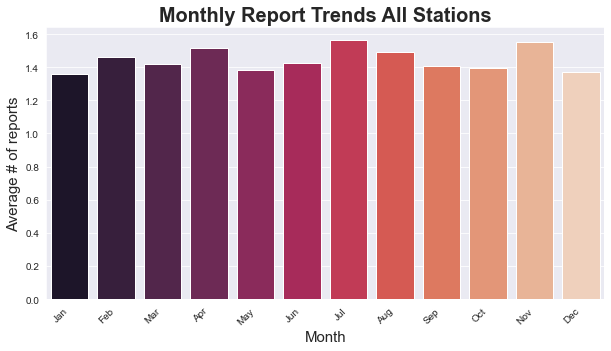

In [868]:
plot_x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plot_y_2

y_pos = np.arange(len(x))


plt.figure(figsize=(10,5))
ax = sns.barplot(plot_x,plot_y_2, palette = 'rocket')
plt.title('Monthly Report Trends All Stations',fontweight='bold', fontsize = 20)
plt.xlabel('Month',fontsize = 15)
plt.xticks(y_pos,x,rotation = 45,horizontalalignment='right')
plt.ylabel('Average # of reports', fontsize = 15);

In [893]:
plot_x

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [894]:
plot_y

[1.7777777777777777,
 1.8,
 2.2222222222222223,
 3.2222222222222223,
 2.111111111111111,
 2.0,
 2.875,
 2.625,
 1.625,
 1.875,
 3.0,
 2.25]

In [869]:
months_data

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,monthly_average
0,238 ST,Jan,1,87493.0,1,1.357143
8348,8 AV,Jan,1,1521454.0,1,1.357143
8288,157 ST,Jan,1,554118.0,1,1.357143
8258,PARKCHESTER,Jan,1,804585.0,1,1.357143
8228,WESTCHESTER SQ,Jan,1,291858.0,1,1.357143
...,...,...,...,...,...,...
125403,METROPOLITAN AV,Dec,1,593620.0,12,1.372093
125217,116 ST,Dec,1,1344415.0,12,1.372093
125186,LAFAYETTE AV,Dec,1,180147.0,12,1.372093
126085,GRD CNTRL-42 ST,Dec,3,7036127.0,12,1.372093


months_data_to_plot

In [870]:
months_data_to_plot

,station,month,monthly_h_reports,monthly_foot_traffic,month_num,monthly_av
6974,GRD CNTRL-42 ST,Jan,1,6978841.0,1,1.777778
6254,FULTON ST,Jan,2,4105058.0,1,1.777778
9128,34 ST-PENN STA,Jan,1,7935429.0,1,1.777778
5774,TIMES SQ-42 ST,Jan,2,4640032.0,1,1.777778
2450,59 ST COLUMBUS,Jan,2,3148757.0,1,1.777778
...,...,...,...,...,...,...
124287,TIMES SQ-42 ST,Dec,1,5213059.0,12,2.250000
122985,14 ST,Dec,4,3545100.0,12,2.250000
122427,59 ST COLUMBUS,Dec,4,3572595.0,12,2.250000
124814,125 ST,Dec,2,3662154.0,12,2.250000


In [871]:
# Look for stations high crime relative to the low foot traffic

In [872]:
yearly_merged_data.tail(50)

,station,month_num,yearly_ft,yearly_crime,rank
217,V.CORTLANDT PK,5,274103.0,1,218.0
218,KINGSTON AV,5,241867.0,1,219.0
219,EASTN PKWY-MUSM,3,238220.0,1,220.0
220,MT EDEN AV,10,237770.0,1,221.0
221,RALPH AV,4,237173.0,1,222.0
222,BEACH 67 ST,8,233872.0,2,223.0
223,E 149 ST,7,231657.0,1,224.0
224,JEFFERSON ST,12,230512.0,1,225.0
225,ROCKAWAY BLVD,12,229326.0,1,226.0
226,LIBERTY AV,10,227789.0,2,227.0


In [911]:
new_var = yearly_merged_data[(yearly_merged_data['rank'] > 134) & (yearly_merged_data['yearly_crime'] > 3)]

In [912]:
new_var

,station,month_num,yearly_ft,yearly_crime,rank
137,MYRTLE-WILLOUGH,2,913889.0,5,138.0
138,74 ST-BROADWAY,4,909326.0,5,139.0
140,CORTELYOU RD,4,890686.0,4,141.0
142,VAN SICLEN AV,2,883001.0,4,143.0
149,PRESIDENT ST,3,788383.0,4,150.0
157,BEVERLEY ROAD,1,686413.0,4,158.0
161,ATLANTIC AV,1,611577.0,19,162.0
164,BROOK AV,7,602942.0,4,165.0
191,CHAUNCEY ST,4,404894.0,4,192.0


In [875]:
new_x = list(new_var['station'])

In [876]:
var = yearly_merged_data[(yearly_merged_data['rank'] > 134)]

In [886]:
var

,station,month_num,yearly_ft,yearly_crime,rank
134,BRIGHTON BEACH,3,975134.0,2,135.0
135,GREENPOINT AV,6,967935.0,2,136.0
136,CORTLANDT ST,8,962277.0,1,137.0
137,MYRTLE-WILLOUGH,2,913889.0,5,138.0
138,74 ST-BROADWAY,4,909326.0,5,139.0
...,...,...,...,...,...
262,CYPRESS HILLS,10,67548.0,1,263.0
263,AQUEDUCT RACETR,6,60305.0,1,264.0
264,BEACH 36 ST,7,58483.0,1,265.0
265,NEPTUNE AV,8,47116.0,1,266.0


In [917]:
this_y

[5, 5, 4, 4, 4, 4, 19, 4, 4]

In [916]:
this_x

['MYRTLE-WILLOUGH',
 '74 ST-BROADWAY',
 'CORTELYOU RD',
 'VAN SICLEN AV',
 'PRESIDENT ST',
 'BEVERLEY ROAD',
 'ATLANTIC AV',
 'BROOK AV',
 'CHAUNCEY ST']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


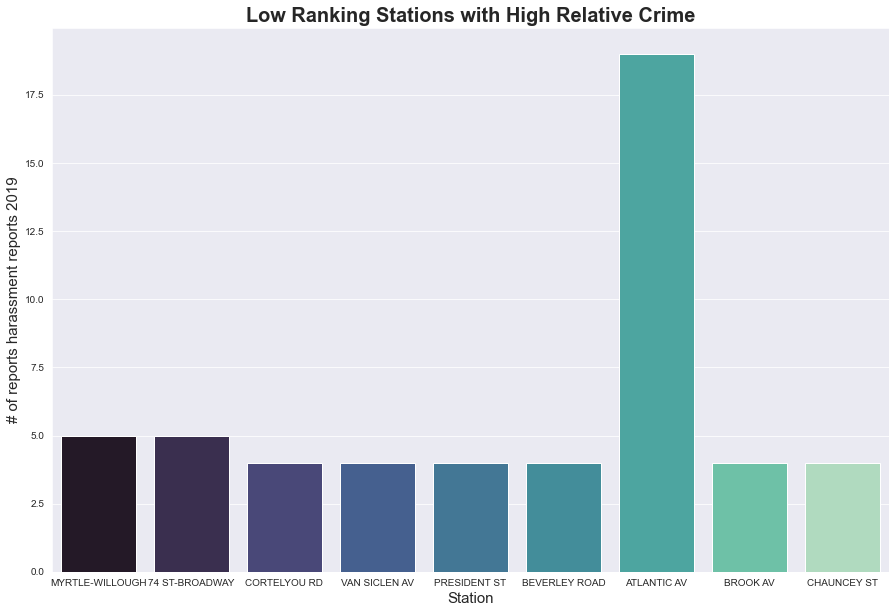

In [920]:


plt.figure(figsize=(15,10))
sns.barplot(this_x,this_y,palette = 'mako')
plt.title('Low Ranking Stations with High Relative Crime',fontweight='bold', fontsize = 20)
plt.xlabel('Station',fontsize = 15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,],labels=this_x)
plt.ylabel('# of reports harassment reports 2019', fontsize = 15);

In [887]:
var_to_plot = var.copy()
col_names = ['station','month_num','rank']
var_to_plot.drop(labels = col_names, axis=1,inplace=True)